In [1]:
def scale(im):
    if len(im)>len(im[0]):
        if (len(im)-len(im[0]))%2==1:
            a=int((len(im)-len(im[0])-1)/2)
            b=a+1
        else:
            a=int((len(im)-len(im[0]))/2)
            b=a
        im=im.tolist()
        im.reverse()
        for j in range(a):
            del im[0]
        im.reverse()
        for j in range(b):
            del im[0]
        im=np.array(im)
    else:
        if (len(im[0])-len(im))%2==1:
            a=int((len(im[0])-len(im)-1)/2)
            b=a+1
        else:
            a=int((len(im[0])-len(im))/2)
            b=a
        im=im.tolist()
        for j in range(len(im)):
            im[j].reverse()
            for k in range(b):
                del im[j][0]
            im[j].reverse()
            for k in range(a):
                del im[j][0]
        im=np.array(im)
    return im

In [2]:
from tensorflow import image
import tensorflow as tf
def resizeIm(im):
    im = image.resize(im,(128,128))
    im = tf.cast(im, tf.float32) / 255.0
    return im

0th file...
image uploaded
1th file...
image uploaded
2th file...
image uploaded
3th file...
image uploaded
4th file...
image uploaded
5th file...
image uploaded
6th file...
image uploaded
7th file...
image uploaded
8th file...
image uploaded
9th file...
image uploaded
10th file...
image uploaded
11th file...
image uploaded
12th file...
image uploaded
13th file...
image uploaded
14th file...
image uploaded
15th file...
image uploaded
16th file...
image uploaded
17th file...
image uploaded
18th file...
image uploaded
19th file...
image uploaded
20th file...
image uploaded
21th file...
image uploaded
22th file...
image uploaded
23th file...
image uploaded
24th file...
image uploaded
25th file...
image uploaded
26th file...
image uploaded
27th file...
image uploaded
28th file...
image uploaded
29th file...
image uploaded
30th file...
image uploaded
31th file...
image uploaded
32th file...
image uploaded
33th file...
image uploaded
34th file...
image uploaded
35th file...
image uploaded
36

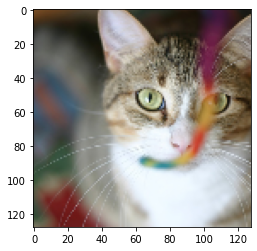

In [3]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

import glob
cat_list = []

for i, filename in enumerate(glob.glob('cat/archive/*.jpg')):
    print(f'{i}th file...')
    with Image.open(filename) as im:
        im=np.array(im)
        im=scale(im)
        im=resizeIm(im)
        cat_list.append(im)
    print('image uploaded')
    if len(cat_list)>100:
        break
imgplot = plt.imshow(cat_list[0])
plt.show()

In [4]:
print(f'There are {len(cat_list)} cat images in cat_list')
print(f'their type is {type(cat_list[0])}')
arrsize=[]
for i in cat_list:
    if len(i) not in arrsize:
        arrsize.append(len(i))
minsize=min(arrsize)
maxsize=max(arrsize)
print(f'array size(height of image) is vary from {minsize} to {maxsize}')
arrsize=[]
for i in cat_list:
    if len(i[0]) not in arrsize:
        arrsize.append(len(i[0]))
minsize=min(arrsize)
maxsize=max(arrsize)
print(f'array size(width of image) is vary from {minsize} to {maxsize}')
print(f'a pixel in each image of width x height size has [r, g, b] value\n')
print(f'len(cat_list[0]) ({len(cat_list[0])}) is height of a image')
print(f'len(cat_list[0][0]) ({len(cat_list[0][0])}) is width of a image')
print(f'cat_list[0][0][0] ({cat_list[0][0][0]}) is r,g,b of a pixel')

There are 101 cat images in cat_list
their type is <class 'tensorflow.python.framework.ops.EagerTensor'>
array size(height of image) is vary from 128 to 128
array size(width of image) is vary from 128 to 128
a pixel in each image of width x height size has [r, g, b] value

len(cat_list[0]) (128) is height of a image
len(cat_list[0][0]) (128) is width of a image
cat_list[0][0][0] ([0.46122855 0.30592832 0.16475184]) is r,g,b of a pixel


In [9]:
arrsize=[]
for k,i in enumerate(cat_list):
    if len(i) not in arrsize:
        arrsize.append(len(i))
    if len(i)==101:
        print(k)

In [13]:
for i in cat_list:
    flipped=image.flip_left_right(i)
    cat_list.append(flipped)

In [ ]:
imgplot = plt.imshow(cat_list[9994])
plt.show()

In [ ]:
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dropout,Conv2DTranspose,concatenate
from tensorflow.keras import Input
def build_model(input_layer, start_neurons):
    conv1 = Conv2D(start_neurons * 1, (3, 3), activation="relu", padding="same")(input_layer)
    conv1 = Conv2D(start_neurons * 1, (3, 3), activation="relu", padding="same")(conv1)
    pool1 = MaxPooling2D((2, 2))(conv1)
    pool1 = Dropout(0.25)(pool1)

    conv2 = Conv2D(start_neurons * 2, (3, 3), activation="relu", padding="same")(pool1)
    conv2 = Conv2D(start_neurons * 2, (3, 3), activation="relu", padding="same")(conv2)
    pool2 = MaxPooling2D((2, 2))(conv2)
    pool2 = Dropout(0.5)(pool2)

    conv3 = Conv2D(start_neurons * 4, (3, 3), activation="relu", padding="same")(pool2)
    conv3 = Conv2D(start_neurons * 4, (3, 3), activation="relu", padding="same")(conv3)
    pool3 = MaxPooling2D((2, 2))(conv3)
    pool3 = Dropout(0.5)(pool3)

    conv4 = Conv2D(start_neurons * 8, (3, 3), activation="relu", padding="same")(pool3)
    conv4 = Conv2D(start_neurons * 8, (3, 3), activation="relu", padding="same")(conv4)
    pool4 = MaxPooling2D((2, 2))(conv4)
    pool4 = Dropout(0.5)(pool4)

    # Middle
    convm = Conv2D(start_neurons * 16, (3, 3), activation="relu", padding="same")(pool4)
    convm = Conv2D(start_neurons * 16, (3, 3), activation="relu", padding="same")(convm)
    
    deconv4 = Conv2DTranspose(start_neurons * 8, (3, 3), strides=(2, 2), padding="same")(convm)
    uconv4 = concatenate([deconv4, conv4])
    uconv4 = Dropout(0.5)(uconv4)
    uconv4 = Conv2D(start_neurons * 8, (3, 3), activation="relu", padding="same")(uconv4)
    uconv4 = Conv2D(start_neurons * 8, (3, 3), activation="relu", padding="same")(uconv4)

    deconv3 = Conv2DTranspose(start_neurons * 4, (3, 3), strides=(2, 2), padding="same")(uconv4)
    uconv3 = concatenate([deconv3, conv3])
    uconv3 = Dropout(0.5)(uconv3)
    uconv3 = Conv2D(start_neurons * 4, (3, 3), activation="relu", padding="same")(uconv3)
    uconv3 = Conv2D(start_neurons * 4, (3, 3), activation="relu", padding="same")(uconv3)

    deconv2 = Conv2DTranspose(start_neurons * 2, (3, 3), strides=(2, 2), padding="same")(uconv3)
    uconv2 = concatenate([deconv2, conv2])
    uconv2 = Dropout(0.5)(uconv2)
    uconv2 = Conv2D(start_neurons * 2, (3, 3), activation="relu", padding="same")(uconv2)
    uconv2 = Conv2D(start_neurons * 2, (3, 3), activation="relu", padding="same")(uconv2)

    deconv1 = Conv2DTranspose(start_neurons * 1, (3, 3), strides=(2, 2), padding="same")(uconv2)
    uconv1 = concatenate([deconv1, conv1])
    uconv1 = Dropout(0.5)(uconv1)
    uconv1 = Conv2D(start_neurons * 1, (3, 3), activation="relu", padding="same")(uconv1)
    uconv1 = Conv2D(start_neurons * 1, (3, 3), activation="relu", padding="same")(uconv1)
    
    output_layer = Conv2D(1, (1,1), padding="same", activation="sigmoid")(uconv1)
    
    return output_layer

img_size_target=128
input_layer = Input((img_size_target, img_size_target, 1))
output_layer = build_model(input_layer, 16)

In [ ]:
model = Model(input_layer, output_layer)

In [ ]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
model.summary()